In [12]:
import os
print(os.getcwd())

import xarray as xr

file_path = "../data/climate-monthly/netcdf/PM25/GWRwSPEC_PM25_NA_200001_200001-RH35.nc"
ds = xr.open_dataset(file_path)
print(ds.values)

/Users/oahmet/Projects/pm-mortality-generative/notebooks
<bound method Mapping.values of <xarray.Dataset> Size: 169MB
Dimensions:  (LON: 9300, LAT: 4550)
Coordinates:
  * LON      (LON) float64 74kB -138.0 -138.0 -138.0 ... -45.03 -45.01 -45.01
  * LAT      (LAT) float64 36kB 68.0 67.99 67.97 67.96 ... 22.52 22.51 22.5
Data variables:
    PM25     (LAT, LON) float32 169MB ...>


In [2]:
# import packages 
import xarray as xr 
import rioxarray as rio 
import rasterio
from rasterio.plot import show

def print_image (path) :    
    nc_file = xr.open_dataset(path)
    bT = nc_file['PM25']
    bT = bT.rio.set_spatial_dims(x_dim='LON', y_dim='LAT')
    bT.rio.write_crs("epsg:4326", inplace=True)
    bT.rio.to_raster(r"medsea_bottomT_raster.tif")
    fp = r'medsea_bottomT_raster.tif'
    img = rasterio.open(fp)
    show(img)

In [7]:
# import packages 
import xarray as xr 
import rioxarray as rio 
import rasterio
from rasterio.plot import show

def print_image_new_dataloader(path) :    
    nc_file = xr.open_dataset(path)
    #bT = nc_file['PM25']
    bT = nc_file.rio.set_spatial_dims(x_dim='lon', y_dim='lat')
    bT.rio.write_crs("epsg:4326", inplace=True)
    bT.rio.to_raster(r"medsea_bottomT_raster.tif")
    fp = r'medsea_bottomT_raster.tif'
    img = rasterio.open(fp)
    show(img)

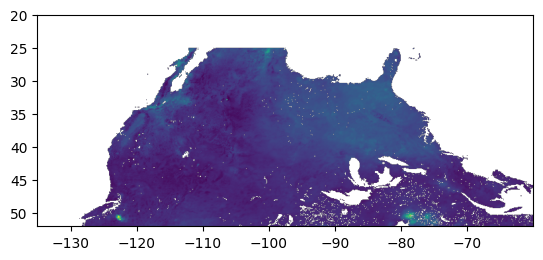

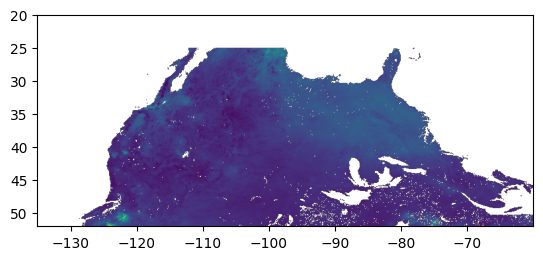

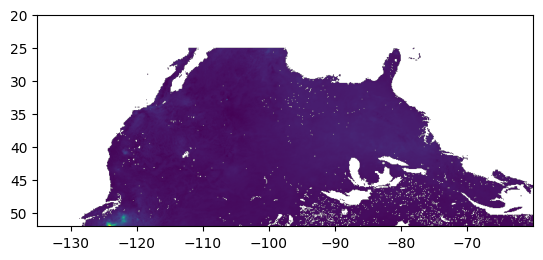

In [13]:
print_image_new_dataloader("../data/monthly/pm25/200906.nc")
print_image_new_dataloader("../data/monthly/pm25/200907.nc")
print_image_new_dataloader("../data/monthly/pm25/200908.nc")

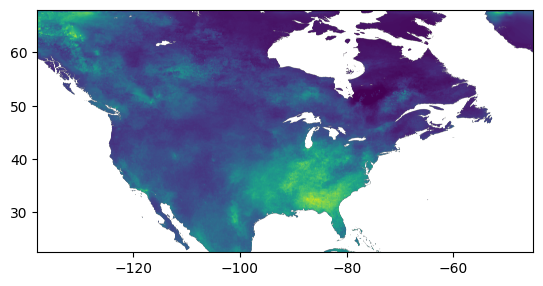

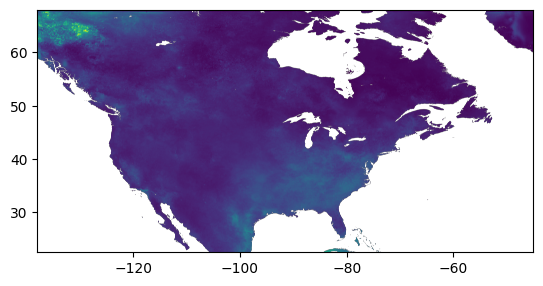

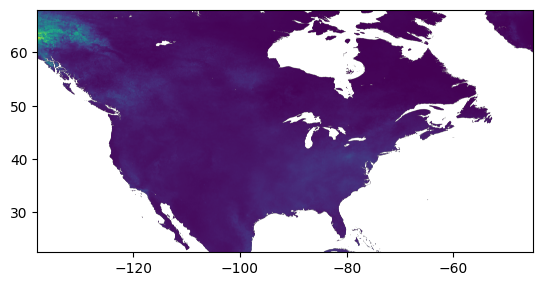

In [15]:
print_image("../data/climate-monthly/netcdf/PM25/GWRwSPEC_PM25_NA_200906_200906-RH35.nc")
print_image("../data/climate-monthly/netcdf/PM25/GWRwSPEC_PM25_NA_200907_200907-RH35.nc")
print_image("../data/climate-monthly/netcdf/PM25/GWRwSPEC_PM25_NA_200908_200908-RH35.nc")